In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dfFeatures = pd.read_csv('common_features_final.csv')
dfFeatures.head()

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,IQR,sd,sfm,Q25,sp.ent,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
0,../audio/common_voice_en_18534851.mp3,1.653417,222.014108,51.318958,16.829330,2.590946,2.357206,0.000144,0.561122,-2756.461625,...,3663.251888,-3.327086,0.095370,NaN,1127.815114,1885.367500,1247.598150,23.589174,1004.416270,17.423055
1,../audio/common_voice_en_19721473.mp3,3.658958,197.900264,36.011095,12.566395,1.456908,1.533911,0.000169,0.601329,-1791.164835,...,2891.063764,-1.810684,0.156760,NaN,807.153529,1663.325883,1365.104317,20.550304,825.206255,21.206819
2,../audio/common_voice_en_19065733.mp3,4.512229,205.211739,38.502619,11.249075,3.795021,2.017890,0.000100,0.755722,-1614.028249,...,3191.527166,-0.282858,-0.241512,NaN,911.114641,1936.694616,1566.146510,17.980653,946.682492,18.485606
3,../audio/common_voice_en_19703218.mp3,3.530958,224.594040,33.974662,15.751549,1.626245,1.766607,0.000816,0.786259,-1287.487543,...,3883.665380,-3.129440,-1.297744,NaN,1137.082244,2159.956393,1681.821265,16.690934,1089.187254,16.067026
4,../audio/common_voice_en_19647089.mp3,2.592146,214.070751,35.974475,10.610504,3.511184,2.139404,0.000139,1.287711,-1704.588366,...,3270.084778,-0.087711,1.686078,NaN,912.061635,1985.724704,1641.399212,17.118389,968.750749,18.064502


In [16]:
dfFeatures['voiceID'] = dfFeatures['voiceID'].str.lstrip('../audio/')

In [17]:
dfFeatures.head()

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,IQR,sd,sfm,Q25,sp.ent,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
0,common_voice_en_18534851.mp3,1.653417,222.014108,51.318958,16.829330,2.590946,2.357206,0.000144,0.561122,-2756.461625,...,3663.251888,-3.327086,0.095370,NaN,1127.815114,1885.367500,1247.598150,23.589174,1004.416270,17.423055
1,common_voice_en_19721473.mp3,3.658958,197.900264,36.011095,12.566395,1.456908,1.533911,0.000169,0.601329,-1791.164835,...,2891.063764,-1.810684,0.156760,NaN,807.153529,1663.325883,1365.104317,20.550304,825.206255,21.206819
2,common_voice_en_19065733.mp3,4.512229,205.211739,38.502619,11.249075,3.795021,2.017890,0.000100,0.755722,-1614.028249,...,3191.527166,-0.282858,-0.241512,NaN,911.114641,1936.694616,1566.146510,17.980653,946.682492,18.485606
3,common_voice_en_19703218.mp3,3.530958,224.594040,33.974662,15.751549,1.626245,1.766607,0.000816,0.786259,-1287.487543,...,3883.665380,-3.129440,-1.297744,NaN,1137.082244,2159.956393,1681.821265,16.690934,1089.187254,16.067026
4,common_voice_en_19647089.mp3,2.592146,214.070751,35.974475,10.610504,3.511184,2.139404,0.000139,1.287711,-1704.588366,...,3270.084778,-0.087711,1.686078,NaN,912.061635,1985.724704,1641.399212,17.118389,968.750749,18.064502


In [18]:
dfLabel = pd.read_csv('filtered_data_labeled.tsv', sep='\t')
dfLabel.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,label
0,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687170.mp3,He associated with the Formists.,2,1,fifties,female,us,3
1,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687171.mp3,"The ""ultra accelerator"" injection gives Derric...",2,1,fifties,female,us,3
2,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687172.mp3,"Despite running as a joke, candidates have won...",2,0,fifties,female,us,3
3,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687173.mp3,Stoner also guest-starred in the television dr...,2,0,fifties,female,us,3
4,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687174.mp3,Rainelle was named for the Raine family.,2,0,fifties,female,us,3


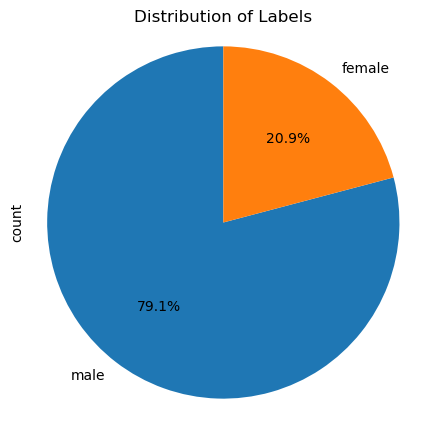

In [19]:
dfLabel["gender"].value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Labels')
plt.show()

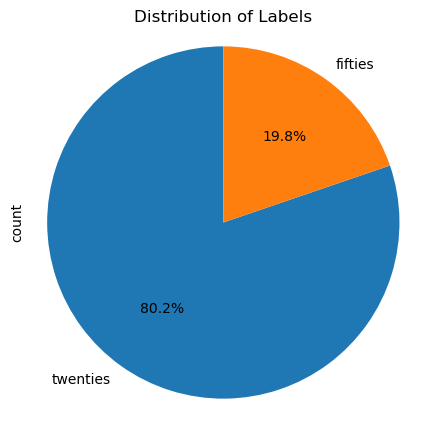

In [20]:
dfLabel["age"].value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Labels')
plt.show()

In [21]:
# Merge the two data frames on the condition that dfFeatures['voiceID'] == dfLabel['path']
df = pd.merge(dfFeatures, dfLabel[['path', 'age', 'gender']], left_on='voiceID', right_on='path', how='inner')

# Drop the 'path' column if it's no longer needed
df = df.drop(columns=['path'])

# Display the merged data frame
df.head()

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,IQR,sd,sfm,Q25,sp.ent,...,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,age,gender
0,common_voice_en_18534851.mp3,1.653417,222.014108,51.318958,16.829330,2.590946,2.357206,0.000144,0.561122,-2756.461625,...,0.095370,NaN,1127.815114,1885.367500,1247.598150,23.589174,1004.416270,17.423055,twenties,female
1,common_voice_en_19721473.mp3,3.658958,197.900264,36.011095,12.566395,1.456908,1.533911,0.000169,0.601329,-1791.164835,...,0.156760,NaN,807.153529,1663.325883,1365.104317,20.550304,825.206255,21.206819,twenties,female
2,common_voice_en_19065733.mp3,4.512229,205.211739,38.502619,11.249075,3.795021,2.017890,0.000100,0.755722,-1614.028249,...,-0.241512,NaN,911.114641,1936.694616,1566.146510,17.980653,946.682492,18.485606,fifties,female
3,common_voice_en_19703218.mp3,3.530958,224.594040,33.974662,15.751549,1.626245,1.766607,0.000816,0.786259,-1287.487543,...,-1.297744,NaN,1137.082244,2159.956393,1681.821265,16.690934,1089.187254,16.067026,twenties,female
4,common_voice_en_19647089.mp3,2.592146,214.070751,35.974475,10.610504,3.511184,2.139404,0.000139,1.287711,-1704.588366,...,1.686078,NaN,912.061635,1985.724704,1641.399212,17.118389,968.750749,18.064502,twenties,female


In [31]:
print(df.shape[1] - 3)

38


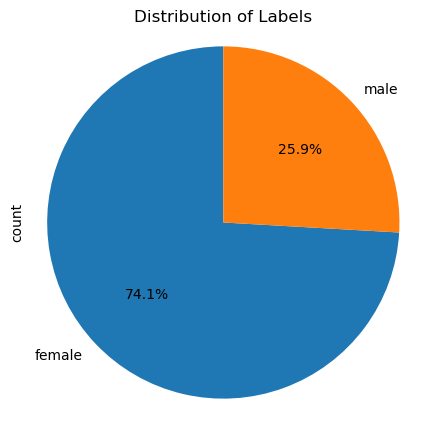

In [36]:
df["gender"].value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Labels')
plt.show()

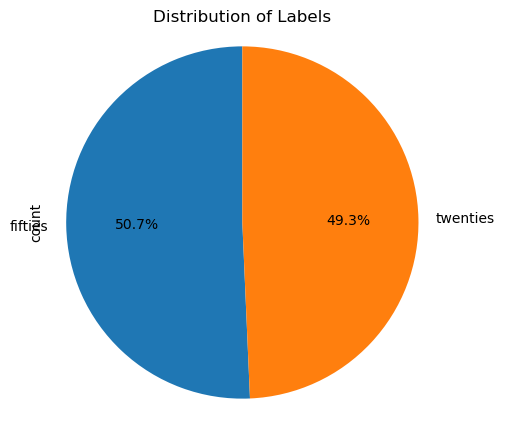

In [37]:
df["age"].value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Labels')
plt.show()

In [33]:
features = df.columns.tolist()[1:-2]

In [4]:
def features_histograms(features_csv_path, ncols=3, labels_tsv_path='filtered_data_labeled.tsv',target='gender'):
    df = pd.read_csv(features_csv_path)
    # dfFeatures['voiceID'] = dfFeatures['voiceID'].str.lstrip('../audio/')
    dfLabel = pd.read_csv(labels_tsv_path, sep='\t')
    # Merge the two data frames on the condition that dfFeatures['voiceID'] == dfLabel['path']
    # df = pd.merge(dfFeatures, dfLabel[['path', 'age', 'gender']], left_on='voiceID', right_on='path', how='inner')
    # Drop the 'path' column if it's no longer needed
    # df = df.drop(columns=['voiceID'])

    # Number of rows and columns for subplots
    num_features = df.shape[1] - 3
    nrows = (num_features + ncols - 1) // ncols  # Calculate the number of rows needed

    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    features = df.columns[1:-2]
    print(target)
    # Plot each feature in a separate subplot
    for i, feature in enumerate(features):
        try:
            ax = axes[i]
            ax.hist(df[df['gender'] == 0][feature], bins=30, color='green', alpha=0.7, label='females')
            ax.hist(df[df['gender'] == 1][feature], bins=30, color='blue', alpha=0.7, label='males')
            ax.set_title(f'Histogram of {feature} by Age')
            ax.set_xlabel(feature)
            ax.set_ylabel('Frequency')
            ax.legend()
            ax.grid(axis='y', alpha=0.75)
        except:
            continue
        
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    print(df.columns)

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [8]:
df1=pd.read_csv('males_females.csv')
selected_columns=['voiceID','meanF0Hz','stdevF0Hz','localabsoluteJitter','f1_median','HNR','apq5Shimmer','f4_mean','f4_median']
df1=df1.loc[:, selected_columns]
df2=pd.read_csv('males_females_mfcc.csv')
df=pd.merge(df1, df2, on='voiceID', how='inner')
# df.drop(columns=['voiceID'], inplace=True)
df.to_csv('all_features.csv', index=False)

gender
Index(['voiceID', 'mean_1', 'mean_2', 'mean_3', 'mean_4', 'mean_5', 'mean_6',
       'mean_7', 'mean_8', 'mean_9', 'mean_10', 'mean_11', 'mean_12',
       'mean_13', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13',
       'min_1', 'min_2', 'min_3', 'min_4', 'min_5', 'min_6', 'min_7', 'min_8',
       'min_9', 'min_10', 'min_11', 'min_12', 'min_13', 'max_1', 'max_2',
       'max_3', 'max_4', 'max_5', 'max_6', 'max_7', 'max_8', 'max_9', 'max_10',
       'max_11', 'max_12', 'max_13', 'p25_1', 'p25_2', 'p25_3', 'p25_4',
       'p25_5', 'p25_6', 'p25_7', 'p25_8', 'p25_9', 'p25_10', 'p25_11',
       'p25_12', 'p25_13', 'p75_1', 'p75_2', 'p75_3', 'p75_4', 'p75_5',
       'p75_6', 'p75_7', 'p75_8', 'p75_9', 'p75_10', 'p75_11', 'p75_12',
       'p75_13', 'gender'],
      dtype='object')


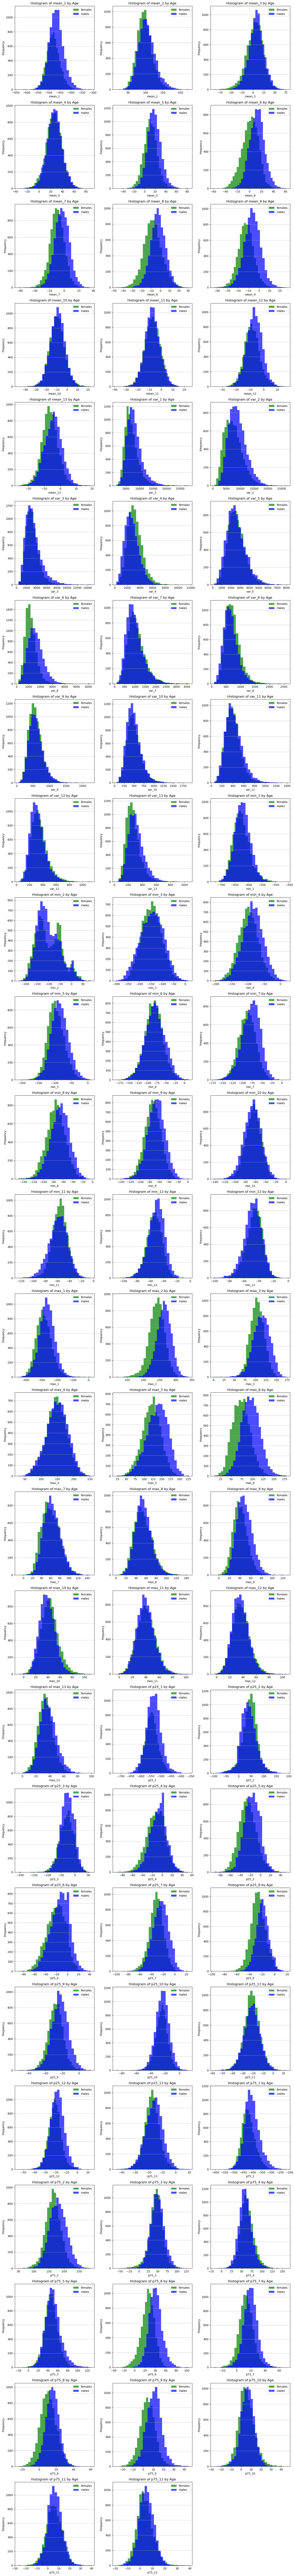

In [5]:
features_histograms('males_females_mfcc.csv')

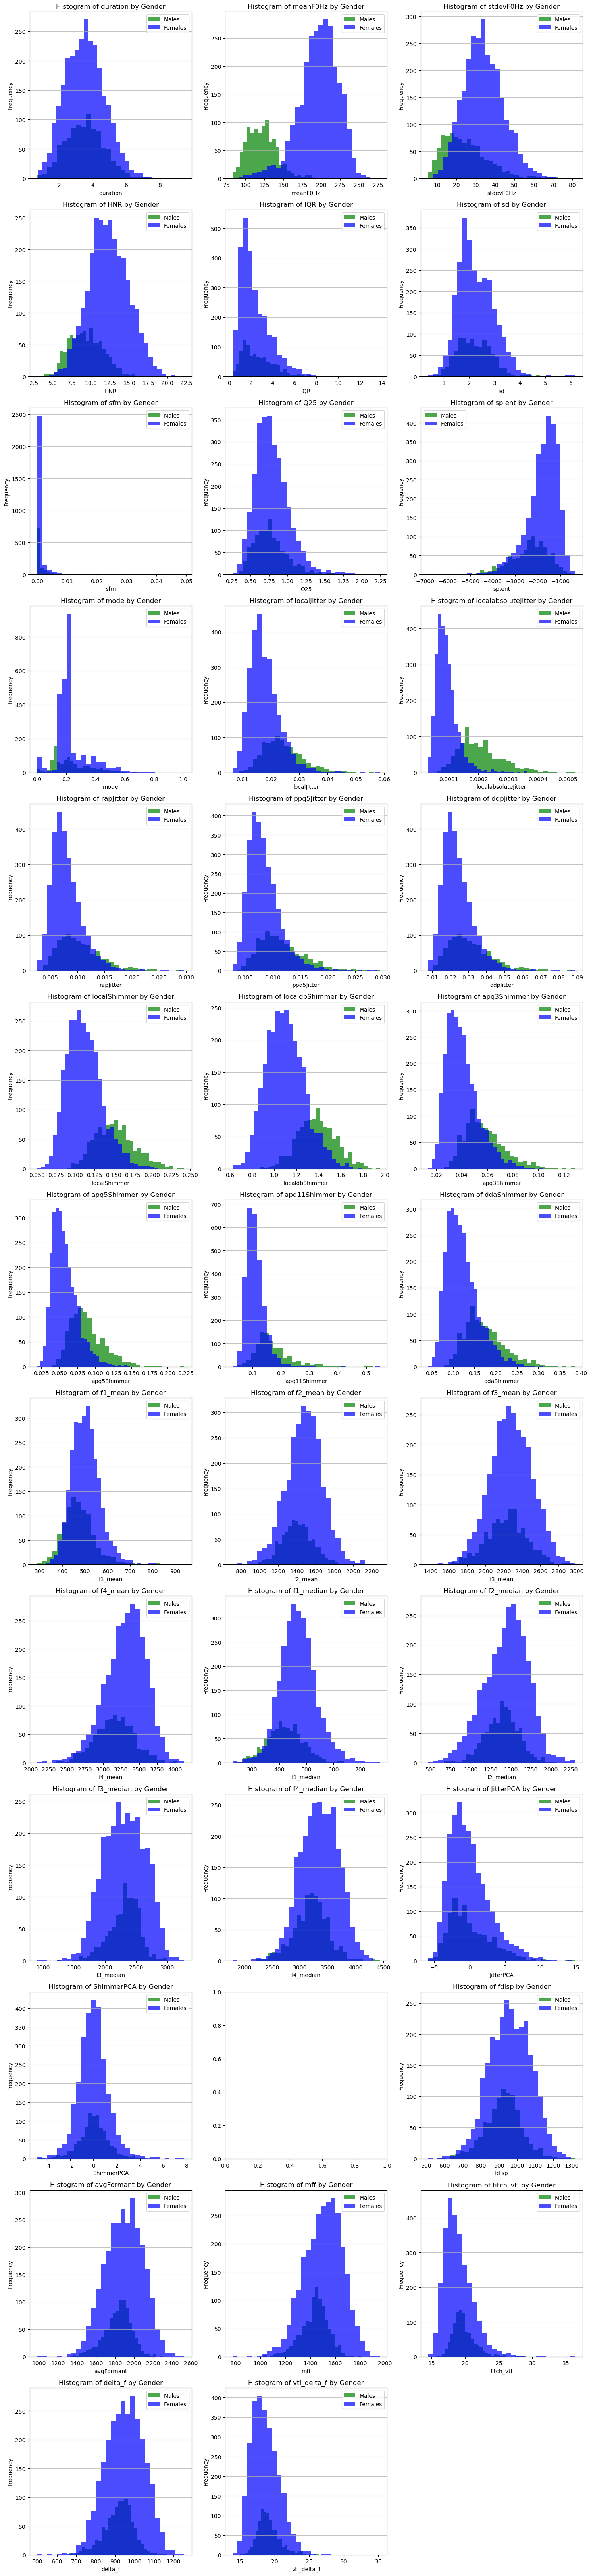

In [35]:
# Number of rows and columns for subplots
ncols = 3
nrows = (num_features + ncols - 1) // ncols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    try:
        ax = axes[i]
        ax.hist(df[df['gender'] == 'male'][feature], bins=30, color='green', alpha=0.7, label='Males')
        ax.hist(df[df['gender'] == 'female'][feature], bins=30, color='blue', alpha=0.7, label='Females')
        ax.set_title(f'Histogram of {feature} by Gender')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(axis='y', alpha=0.75)
    except:
        continue
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()